# Breast Cancer Detection with Machine Learning

## Import Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
sns.set_style("whitegrid")
plt.style.use("seaborn-whitegrid")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load dataset

In [3]:
data = load_breast_cancer(as_frame=True)

### Data Description

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Column Names

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

## Data Preprocessing

## Input and Target

In [7]:
X = data.data
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
y= data.target

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

## Correlation with target column

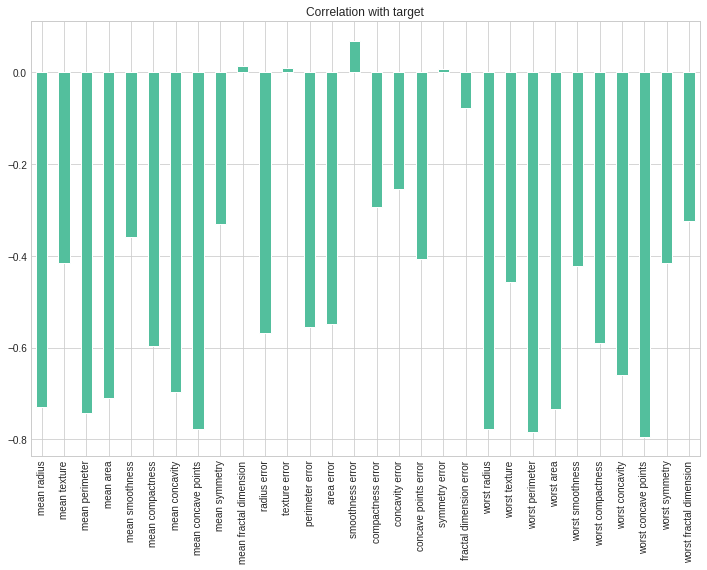

In [10]:
df_corr = X.corrwith(y)
df_corr.plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target",color='#53BF9D');

## Splitting data into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling data with standard Scaller

In [12]:
scaler = StandardScaler()
X_train[data.feature_names] = scaler.fit_transform(X_train[data.feature_names])

In [13]:
X_test[data.feature_names] = scaler.transform(X_test[data.feature_names])

# Machine Learning Models

## Logistic Regression

In [14]:
lr = LogisticRegression(solver='liblinear')

In [15]:
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

## Model Evaluation

In [16]:
def model_eval(clf, X_train, y_train, X_test, y_test, train_score=True):
    if train_score:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train_score==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [17]:
model_eval(lr, X_train, y_train, X_test, y_test, train_score=True)

Train Result:
Accuracy Score: 98.68%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.988024    0.986111  0.986813    0.987068      0.986822
recall       0.976331    0.993007  0.986813    0.984669      0.986813
f1-score     0.982143    0.989547  0.986813    0.985845      0.986797
support    169.000000  286.000000  0.986813  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[165   4]
 [  2 284]]



In [18]:
model_eval(lr, X_train, y_train, X_test, y_test, train_score=False)

Test Result:
Accuracy Score: 97.37%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.976190   0.972222  0.973684    0.974206      0.973719
recall      0.953488   0.985915  0.973684    0.969702      0.973684
f1-score    0.964706   0.979021  0.973684    0.971863      0.973621
support    43.000000  71.000000  0.973684  114.000000    114.000000
_______________________________________________
Confusion Matrix: 
 [[41  2]
 [ 1 70]]



Logistic Regression is performing well on train and test data

## Naive Bayes

In [19]:
gnb = GaussianNB()

In [20]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

### Model Evaluation

In [21]:
model_eval(gnb, X_train, y_train, X_test, y_test, train_score=True)

Train Result:
Accuracy Score: 93.63%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.937500    0.935593  0.936264    0.936547      0.936301
recall       0.887574    0.965035  0.936264    0.926304      0.936264
f1-score     0.911854    0.950086  0.936264    0.930970      0.935886
support    169.000000  286.000000  0.936264  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[150  19]
 [ 10 276]]



In [22]:
model_eval(gnb, X_train, y_train, X_test, y_test, train_score=False)

Test Result:
Accuracy Score: 96.49%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.975610   0.958904  0.964912    0.967257      0.965205
recall      0.930233   0.985915  0.964912    0.958074      0.964912
f1-score    0.952381   0.972222  0.964912    0.962302      0.964738
support    43.000000  71.000000  0.964912  114.000000    114.000000
_______________________________________________
Confusion Matrix: 
 [[40  3]
 [ 1 70]]



## Conclusion

Logistics regression is performing well on train and test data and can be considered as good model for Breast Cancer Detection